In [4]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#load cleaned data path
data_path = r"C:\Users\richa\Documents\Ex_6\02 Data\CWurData_cleaned.csv"
df = pd.read_csv(data_path)
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [7]:
# Count number of universities per country
university_counts = df.groupby('country')['institution'].count().reset_index()
university_counts.rename(columns={'institution':'num_universities'}, inplace=True)

# Check result
university_counts.head()

,country,num_universities
0,Argentina,7
1,Australia,58
2,Austria,24
3,Belgium,20
4,Brazil,36


In [8]:
# Compute average score per country
country_scores = df.groupby('country')['score'].mean().reset_index()


In [9]:
# Merge counts with average scores
country_data = pd.merge(country_scores, university_counts, on='country')

In [10]:
# verify
country_data.head()

,country,score,num_universities
0,Argentina,44.672857,7
1,Australia,45.825517,58
2,Austria,45.139583,24
3,Belgium,47.011000,20
4,Brazil,44.781111,36


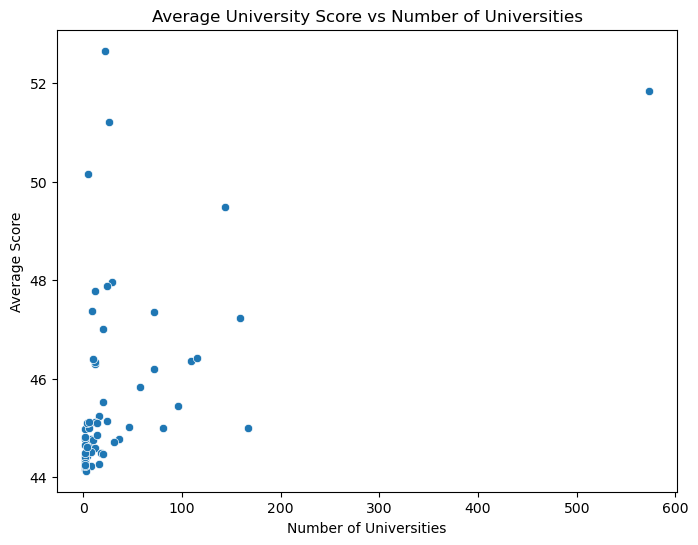

In [11]:
#visualisation
plt.figure(figsize=(8,6))
sns.scatterplot(data=country_data, x='num_universities', y='score')
plt.title('Average University Score vs Number of Universities')
plt.xlabel('Number of Universities')
plt.ylabel('Average Score')
plt.show()

In [12]:
##Linear regression
# Independent variable (X) = number of universities
X = country_data['num_universities'].values.reshape(-1, 1)
# Dependent variable (y) = average score
y = country_data['score'].values

In [13]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
##fit linear regression
# Create model and fit it
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [15]:
# Predict on test set
y_pred = model.predict(X_test)

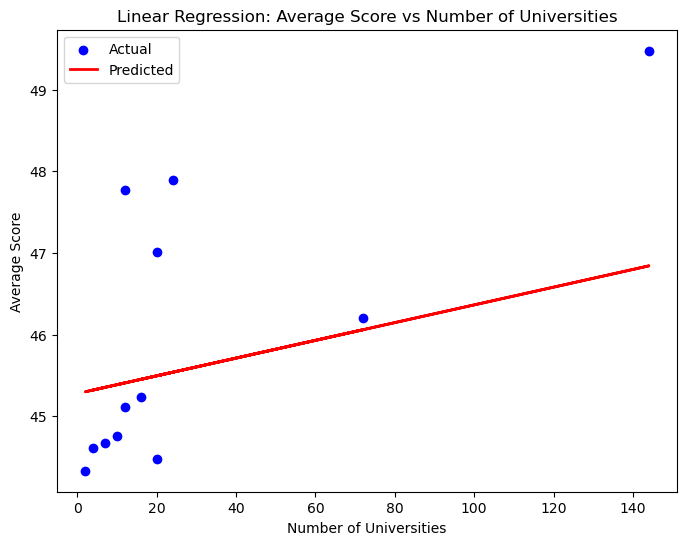

In [16]:
##plot regression line
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Average Score vs Number of Universities')
plt.xlabel('Number of Universities')
plt.ylabel('Average Score')
plt.legend()
plt.show()

In [ ]:
# countries with many universities have low average score

In [17]:
# model perfoemance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 1.98
R² Score: 0.24


In [18]:
# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()

,Actual,Predicted
0,44.672857,45.355178
1,44.335000,45.300921
2,45.112500,45.409436
3,47.774167,45.409436
4,44.615000,45.322624


In [ ]:
# The regression line shows a slight negative trend: countries with more universities often have slightly lower average scores.